In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Training data: input and target 
X = np.array([ [1,1,1,1,1,1,0],
               [0,1,1,0,0,0,0],
               [1,1,0,1,1,0,1],
               [1,1,1,1,0,0,1],
               [0,1,1,0,0,1,1],              
               [1,0,1,1,0,1,1],
               [1,0,1,1,1,1,1],
               [1,1,1,0,0,0,0],
               [1,1,1,1,1,1,1],
               [1,1,1,1,0,1,1] ])
# target output dataset            
Y = np.array([ [1,1,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,0,0,0,0,0,0],
               [1,0,0,1,0,0,0,0,0,0,0],
               [1,0,0,0,1,0,0,0,0,0,0],
               [1,0,0,0,0,1,0,0,0,0,0],
               [1,0,0,0,0,0,1,0,0,0,0],
               [1,0,0,0,0,0,0,1,0,0,0],
               [1,0,0,0,0,0,0,0,1,0,0],
               [1,0,0,0,0,0,0,0,0,1,0],
               [1,0,0,0,0,0,0,0,0,0,1] ])

# define auxiliary variables
N, M, P  = X.shape[0], X.shape[1], Y.shape[1]    # infer matrix shape variables from training data
Y_tilde = np.zeros((N,P))                        # setup storage for network output 

# Hidden layers
Q = 10                    # number of hidden neurons, i.e. "size of hidden layer"
H = np.zeros((N,Q))

# weight matrices
w0 = 2*np.random.random((M,Q)) - 1
w1 = 2*np.random.random((Q,P)) - 1

# Make lists for layers and weights
layers = [X, H, Y_tilde]
weights = [w0, w1]

# Just try a sample calculation with random intialization to see how this works 
# Feed-forward (with linear activation):
for l in range(2):
  layers[l+1] = np.dot(layers[l], weights[l])
  print("layers [",l+1,"] =\n", layers[l+1], sep="")  # sep="" just omits spaces

layers [1] =
[[ 0.95889691 -1.0377483  -3.72998299 -0.29893417  0.25003244  1.15710372
  -1.01780121 -0.61067207  0.68878277 -0.44619918]
 [-0.90218401 -0.20309858 -1.46714511 -0.48561488  0.77897046 -0.76535612
  -0.2722387   0.73860964  0.57146142  0.338583  ]
 [ 0.97018034  0.66377546 -2.27177644 -0.77435332  0.36376542  1.78460513
   1.38584445  0.56150121  1.44572386  0.92599216]
 [-0.19573332  1.13569403 -2.25106231 -0.39047563  0.87477781  0.42595672
  -0.28831497  1.64982247  0.74961377 -0.08425809]
 [-0.20625133  0.27263713 -2.36792603 -0.31644398  1.6043902  -1.32214853
  -0.3237873   0.47854708  0.48114673  0.37685096]
 [ 0.64661451  0.48449258 -2.40875478  0.14632614  0.67256744  0.17771117
  -1.58855389  0.46586324 -0.30115037 -1.29968205]
 [ 1.00820658 -0.470238   -3.3201566  -0.77976781  0.60338846  0.69345006
  -0.60415544 -0.08092137  0.28361008 -0.70919032]
 [-0.43514997 -0.48540651 -1.15964216 -0.35243206 -0.1528167   0.07603279
  -0.51222709  0.49741353  1.26417317 

In [0]:
# Activation choices
def sigmoid(x, deriv=False): 
  f = 1/(1+np.exp(-x))
  return f*(1-f) if deriv else f

def relu(x, deriv=False):   
  return 1*(x>0) if deriv else x*(x>0)

def tanh(x, deriv=False):
  f = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 
  return #I dont know

# Placeholder routine to perform backprop.  Will fill in later
def update_weights(weights, layers, Y, alpha, activ):
  return weights                   # for now, it's a no-op


def fit(layers, Y, activ=[sigmoid]*2, use_bias=True, alpha=1.0, maxiter=10000):
  """
  Routine for training using a multi-layer network
    layers:    list of layer values, i.e. layers =  [X, H, Y_tilde]
    Y:         target output
    activ:     list of activation functions. default = list of 2 sigmoids
    use_bias:  Whether to include a constant offset in weighted sums
    alpha:     learning rate
    maxiter:   number of iterations to run
  """
  lmax = len(layers)-1             # max index of layers, also = # of weights
  
  if use_bias:           # add a column of 1's to every layer except the last
    for el in range(lmax):
        new_col = np.ones((layers[el].shape[0],1)) 
        layers[el] = np.hstack((new_col, layers[el])) 
  
  # Define weights
  np.random.seed(1)                # for reproducibility
  weights = [None]*lmax            # allocate slots in a blank list
  for el in range(lmax):           # "el" because "l" and "1" may look similar
    weights[el] = 2*np.random.random((layers[el].shape[1], layers[el+1].shape[1])) - 1
        
  loss_hist = []                   # start with an empty list
  for iter in range(maxiter):

    # Feed-forward pass
    for el in range(lmax):
      layers[el+1] = activ[el](np.dot(layers[el], weights[el]))
      
    # Loss monitoring
    diff = layers[lmax] - Y
    loss_hist.append( (diff**2).mean()  )    # use MSE loss for monitoring
          
    # Backprop code will go here
    weights = update_weights(weights, layers, Y, alpha, activ)

  return weights, layers[lmax], loss_hist        


# Test this just to make sure it runs
layers = [X,H,Y_tilde]
weights, Y_tilde, loss_hist = fit(layers, Y, maxiter=1)
for el in range(len(weights)):
  print("weights[",el,"] = \n",weights[el], sep="")

weights[0] = 
[[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822 -0.81532281
  -0.62747958 -0.30887855 -0.20646505  0.07763347 -0.16161097]
 [ 0.370439   -0.5910955   0.75623487 -0.94522481  0.34093502 -0.1653904
   0.11737966 -0.71922612 -0.60379702  0.60148914  0.93652315]
 [-0.37315164  0.38464523  0.7527783   0.78921333 -0.82991158 -0.92189043
  -0.66033916  0.75628501 -0.80330633 -0.15778475  0.91577906]
 [ 0.06633057  0.38375423 -0.36896874  0.37300186  0.66925134 -0.96342345
   0.50028863  0.97772218  0.49633131 -0.43911202  0.57855866]
 [-0.79354799 -0.10421295  0.81719101 -0.4127717  -0.42444932 -0.73994286
  -0.96126608  0.35767107 -0.57674377 -0.46890668 -0.01685368]
 [-0.89327491  0.14823521 -0.70654285  0.17861107  0.39951672 -0.79533114
  -0.17188802  0.38880032 -0.17164146 -0.90009308  0.07179281]
 [ 0.32758929  0.02977822  0.88918951  0.17311008  0.80680383 -0.72505059
  -0.72144731  0.61478258 -0.20464633 -0.66929161  0.85501716]
 [-0.30446828  0.50162421  0

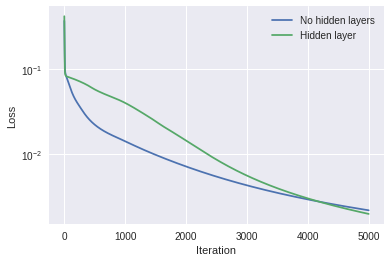

In [0]:
def update_weights(weights, layers, Y, alpha, activ):
  """
  Backprop routine, for arbitrary numbers of layers, assuming weights & 
  activations are defined
  
  Inputs:
    weights: list of arrays of weights between each layer
    layers:  list of arrays of layer values (post-activation function)
    Y:       target output
    alpha:   learning rate
    activ:   list of activation functions for each (non-input) layer
  Outputs:
    weights (updated)
  """
  lmax = len(layers) - 1                        # a useful variable
  assert len(weights)==lmax                     # make sure number of weights match up
  assert len(activ) >= lmax                     # make sure we defined enough activations for the layers
    
  delta = layers[lmax] - Y                      # error between output and target
  
  for el in range(lmax-1, -1, -1):              # Count backwards to layer zero
    fprime = activ[el](np.dot(layers[el], weights[el]), deriv=True)   # deriv of activation
    weights[el] -= alpha * np.dot( layers[el].T, delta*fprime )       # gradient descent step
    delta = np.dot(delta, weights[el].T)*fprime if (el>0) else None   # setup delta for next pass in loop

  return weights           

# Let's run it!
layers = [X, H, Y_tilde]
alpha = 0.1
maxiter=5000
weights, Y_tilde, loss_hist_2weights = fit(layers, Y, alpha=alpha, maxiter=maxiter)

# compare against a 1-weight (no hidden layer) network:
layers = [X, Y_tilde]
weights, Y_tilde, loss_hist_1weight = fit(layers, Y, alpha=alpha, maxiter=maxiter)

# Plot the loss history
plt.semilogy(loss_hist_1weight, label="No hidden layers")
plt.semilogy(loss_hist_2weights, label="Hidden layer")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [0]:
# Let's add more hidden neurons
Q = 50                     # number of hidden neurons, i.e. "size of hidden layer"
H = np.zeros((N,Q))

layers = [X, H, Y_tilde]
weights, Y_tilde, loss_hist_many = fit(layers, Y, alpha=alpha, maxiter=maxiter)

# try a relu activation for the hidden layer (leave output activ as sigmoid!)
weights, Y_tilde, lhm_relu = fit(layers, Y, alpha=alpha, activ=[relu,sigmoid], maxiter=maxiter)

plt.semilogy(loss_hist_1weight, label="0 hidden neurons")
plt.semilogy(loss_hist_2weights, label="4 hidden neurons")
plt.semilogy(loss_hist_many, label="many hidden neurons")
plt.semilogy(lhm_relu, label="many, relu on hidden")

plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [0]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0,1,1,0]]).T
Y_tilde = 0*Y                         # Just allocate some storage
H = np.zeros((N,20))                  

weights, Y_tilde, loss_hist_xor = fit([X,H,Y_tilde], Y, activ=[relu,sigmoid], alpha=0.5)
print("Prediction Y_tilde =",Y_tilde.T)
print("Target Y (correct answer)  =",Y.T)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.loglog(loss_hist_xor)
#print("weights = ",weights)